In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Geod

In [2]:
def great_circle_points(lon1, lat1, lon2, lat2, n=200):
    geod = Geod(ellps="WGS84")
    # retorna lista de tuplas (lon, lat) dos pontos intermediários
    pts = geod.npts(lon1, lat1, lon2, lat2, npts=n)
    if pts:
        lons_inter, lats_inter = map(list, zip(*pts))
    else:
        lons_inter, lats_inter = [], []
    # inclui os pontos de início e fim
    lons = [lon1] + lons_inter + [lon2]
    lats = [lat1] + lats_inter + [lat2]
    return lons, lats

/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


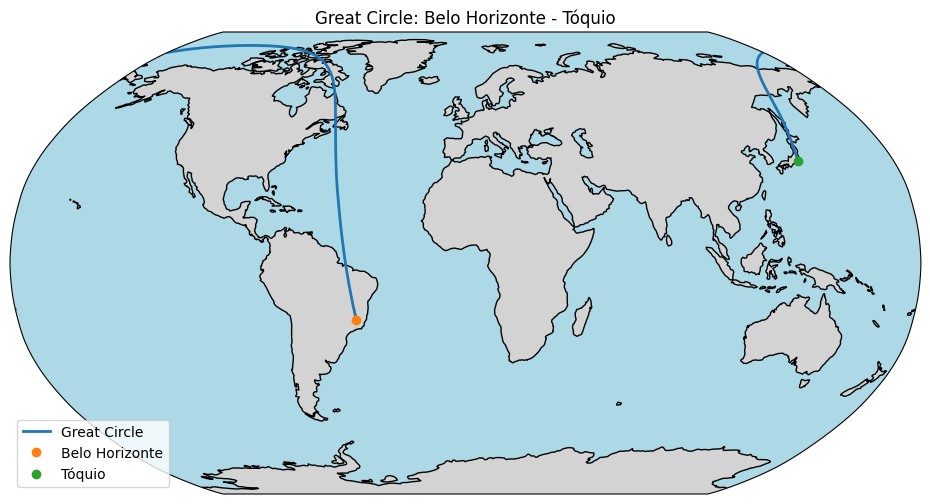

In [4]:
bh = (-19.9, -43.9)      # (lat, lon)
toquio = (35.7, 139.7)   # (lat, lon)

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
    
# passa como (lon, lat) para a função
lons, lats = great_circle_points(bh[1], bh[0], toquio[1], toquio[0], n=300)

# linha geodésica
ax.plot(lons, lats, transform=ccrs.Geodetic(), linewidth=2, label="Great Circle")

# marcadores (PlateCarree espera (lon, lat))
ax.plot(bh[1], bh[0], "o", markersize=6, transform=ccrs.PlateCarree(), label="Belo Horizonte")
ax.plot(toquio[1], toquio[0], "o", markersize=6, transform=ccrs.PlateCarree(), label="Tóquio")

ax.set_title("Great Circle: Belo Horizonte - Tóquio")
ax.legend()
plt.show()